In [1]:
import numpy as np
import cv2
from ball_tracking import Tracker
from matplotlib import pyplot as plt
from matplotlib import patches
from scipy.ndimage import rotate

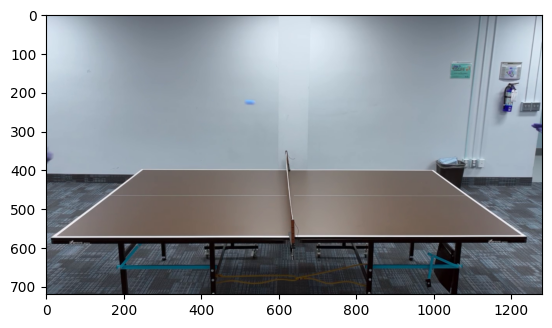

In [2]:
cap = cv2.VideoCapture('./calibrated1.mp4')
corners = {"TL" : [875, 1250], "TR" : [3050, 1250], "BR" : [3700, 1720], "BL": [250, 1720]}

ret, frame = cap.read()
tracker = Tracker(focal_length_px=2880, image_size=frame.shape, table_points=corners)    

for _ in range(110):
    cap.read()  # skip to 200th frame because nothing was happening for a while
    
ret, frame1 = cap.read()
ret, frame2 = cap.read()

plt.imshow(frame1)

In [3]:
tracker.track(frame1, calc_position=False)
detection, score = tracker.track(frame2, calc_position=False)
detection

((569.2522583007812, 231.49107360839844),
 (16.326568603515625, 30.55755043029785),
 98.22644805908203)

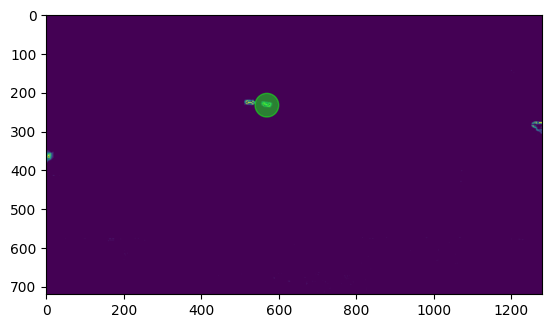

In [4]:
fig, ax = plt.subplots()
ax.imshow(tracker.last_processed_frame)
ax.add_patch(patches.Circle(detection[0], radius=detection[1][1], color=(0.08, 1.0, 0.08, 0.5)))

TypeError: crop_to_ellipse() missing 1 required positional argument: 'padding'

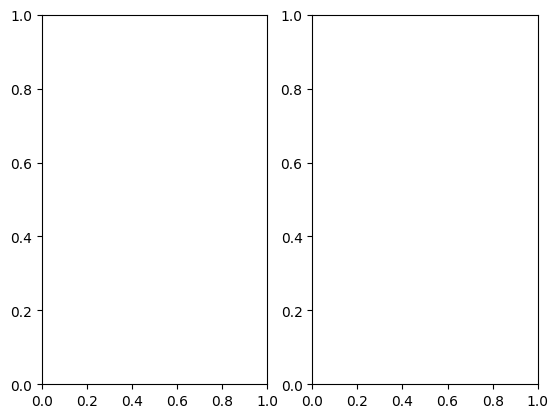

In [ ]:
fig, axes = plt.subplots(1, 2)
cropped = tracker.crop_to_ellipse(tracker.last_processed_frame, detection)
axes[0].imshow(cropped)
axes[1].imshow(tracker.crop_to_ellipse(frame2, detection))

In [ ]:
tracker.count_pixels(tracker.last_processed_frame, detection)

np.int64(14)

In [ ]:
cap = cv2.VideoCapture('./downstairs2_cross_court.mp4')
ret, frame = cap.read()
tracker = Tracker(focal_length_px=2880, image_size=frame.shape)

i = 0
while True:
    ret, current_frame = cap.read()
    i += 1
    print(f"processing frame {i}", end='\r')
    if i < 0:
        continue
    if not ret or i >= 1000:
        break

    detection, score = tracker.track(current_frame, calc_position=False)
print()
    
cap.release()

/home/damian/pingpong/ball_tracking.py:184: RuntimeWarning: divide by zero encountered in scalar divide
  value = (x / (ax1 / 2))**2 + (y / (ax2 / 2))**2
/home/damian/pingpong/ball_tracking.py:184: RuntimeWarning: invalid value encountered in scalar divide
  value = (x / (ax1 / 2))**2 + (y / (ax2 / 2))**2


/home/damian/pingpong/ball_tracking.py:255: RuntimeWarning: invalid value encountered in divide
  normalized = cropped_image / np.max(cropped_image)
/home/damian/pingpong/ball_tracking.py:243: RuntimeWarning: divide by zero encountered in divide
  distance_m = self.focal_length_px * 0.04 / observed_size


processing frame 603


Text(0.5, 1.0, 'Fancy New Pixel Counting')

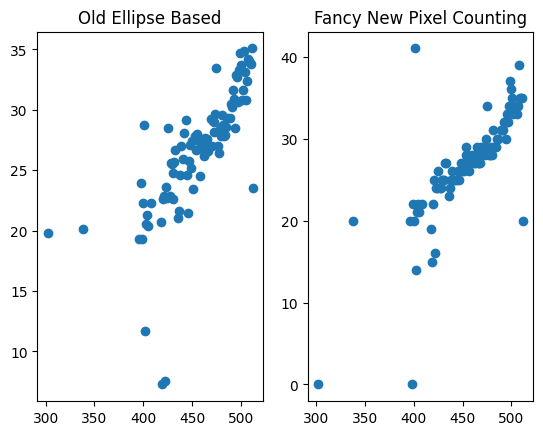

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].scatter(tracker.frame_numbers, [ellipse[1][0] for ellipse in tracker.recorded_detections])
axes[0].set_title("Old Ellipse Based")
axes[1].scatter(tracker.frame_numbers, tracker.recorded_sizes)
axes[1].set_title("Fancy New Pixel Counting")